<a href="https://colab.research.google.com/github/RozhanMk/Time-Series-Analysis/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L -o air-passengers.zip\
  https://www.kaggle.com/api/v1/datasets/download/rakannimer/air-passengers

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   764  100   764    0     0   1433      0 --:--:-- --:--:-- --:--:--     0


In [ ]:
!unzip air-passengers.zip

Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

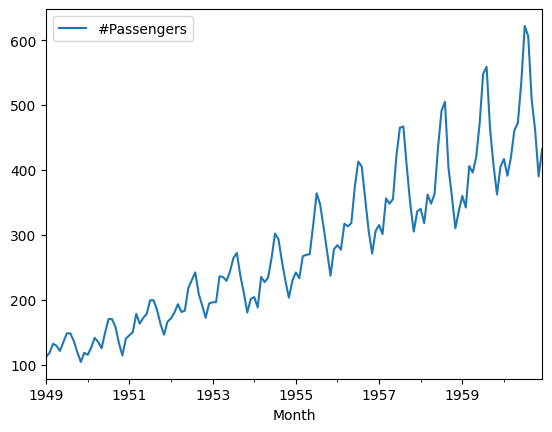

In [ ]:
df = pd.read_csv('AirPassengers.csv', index_col="Month", parse_dates=True)
display(df.head())
df.plot()

In [ ]:
df["differnece"] = df["#Passengers"].diff()
df["log"] = np.log(df["#Passengers"])

<Axes: xlabel='Month'>

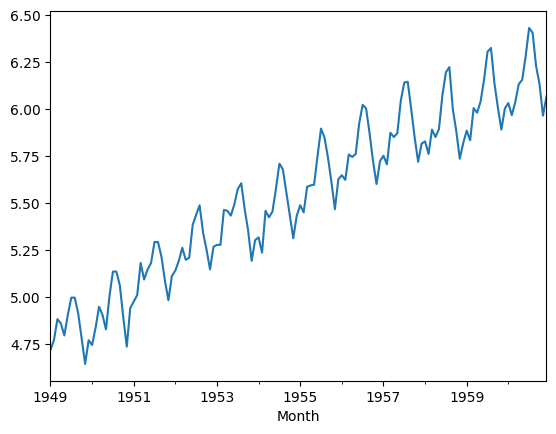

In [ ]:
df["log"].plot()

In [ ]:
df.index.freq = 'MS'

In [ ]:
NS_test = 12
train_data = df["log"][:-NS_test]
test_data = df["log"][-NS_test:]

train_idx = df.index <= train_data.index[-1]
test_idx = df.index > train_data.index[-1]

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


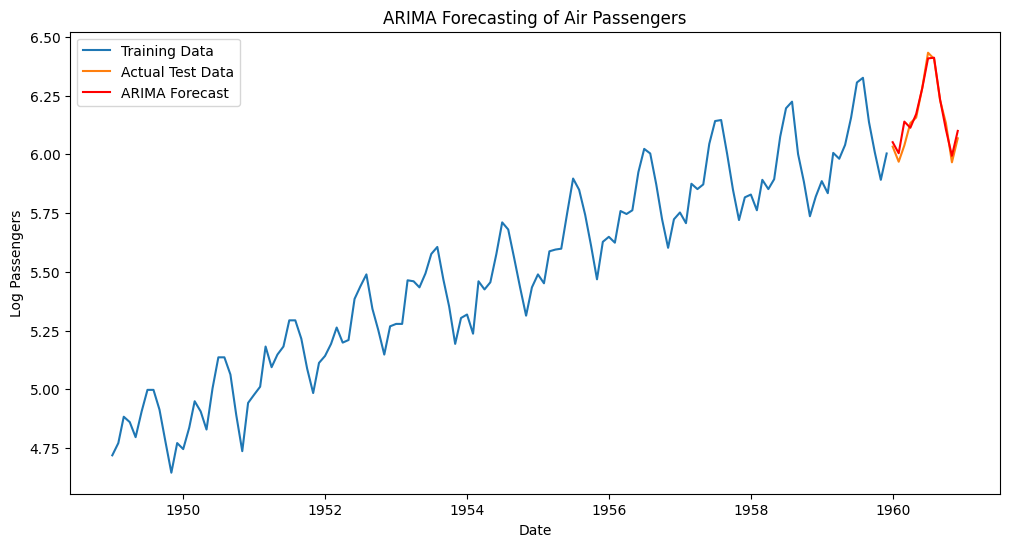

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

order = (12, 1, 0)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=NS_test)

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecasting of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Log Passengers')
plt.legend()
plt.show()

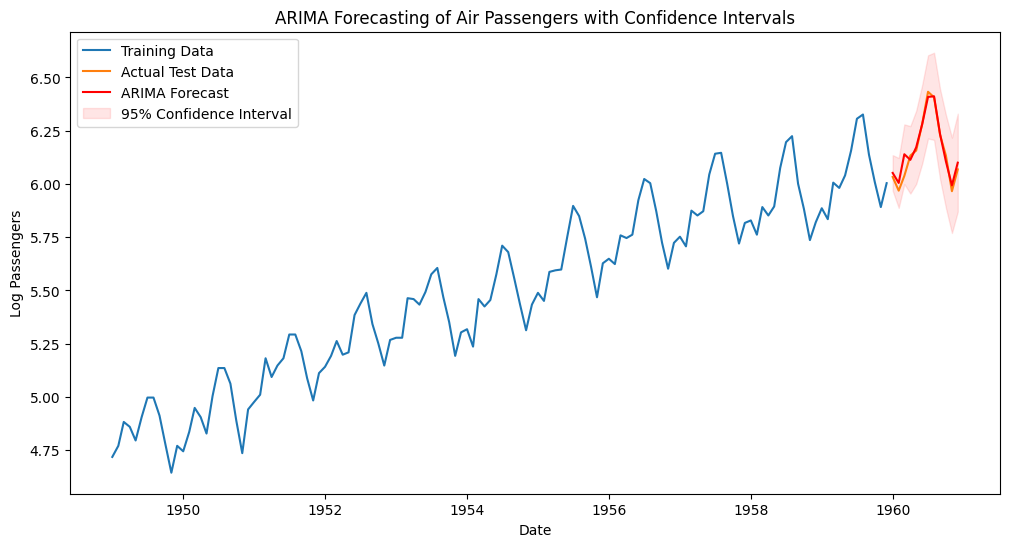

In [ ]:
forecast_result = model_fit.get_forecast(steps=NS_test)
forecast_confidence_intervals = forecast_result.conf_int(alpha=0.05) # 95% confidence interval

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', color='red')
plt.fill_between(test_data.index,
                 forecast_confidence_intervals.iloc[:, 0],
                 forecast_confidence_intervals.iloc[:, 1], color='red', alpha=.1, label='95% Confidence Interval')
plt.title('ARIMA Forecasting of Air Passengers with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Log Passengers')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE and MAPE
rmse_value = rmse(test_data, forecast)
mape_value = mape(test_data, forecast)

print(f"RMSE: {rmse_value:.4f}")
print(f"MAPE: {mape_value:.4f}%")

RMSE: 0.0362
MAPE: 0.4270%
